PART 1: BETA-BINOMIAL MODEL - HAND CALCULATIONS IN CODE

1.1 Model Setup
Prior: θ ~ Beta(1.0, 1.0)
Data: y = 2 successes in N = 12 trials

1.2 Prior Distribution
p(θ) = θ^(1.0-1) × (1-θ)^(1.0-1) / B(1.0, 1.0)
B(1.0, 1.0) = Γ(1.0)×Γ(1.0)/Γ(1.0+1.0) = 1
Since α₀=1, β₀=1: p(θ) = 1 (uniform on [0,1])

1.3 Likelihood
p(y|θ) = C(12,2) × θ^2 × (1-θ)^10
C(12,2) = 12!/2!×10! = 66.0

1.4 Joint Distribution
p(y,θ) = 66.0 × θ^2 × (1-θ)^10

1.5 Log Joint Distribution
log p(y,θ) = log(66.0) + 2×log(θ) + 10×log(1-θ)
More generally:
log p(y,θ) = (1.0+2-1)×log(θ) + (1.0+12-2-1)×log(1-θ) + const
          = 2.0×log(θ) + 10.0×log(1-θ) + const

1.6 Gradient of Log Joint
d/dθ log p(y,θ) = (1.0+2-1)/θ - (1.0+12-2-1)/(1-θ)
               = 2.0/θ - 10.0/(1-θ)

1.7 Finding MAP (Setting Gradient to Zero)
2.0/θ = 10.0/(1-θ)
θ_MAP = 2.0/12.0 = 2/12 = 0.1667

1.8 Posterior Distribution
p(θ|y) ~ Beta(3.0, 11.0)

1.9 Posterior Mean and Variance
E[θ|y] = 3.0/14.0 = 0.2143
Var[θ|y] = 3.0×11.0/[(14.0)²×15.0]
         =

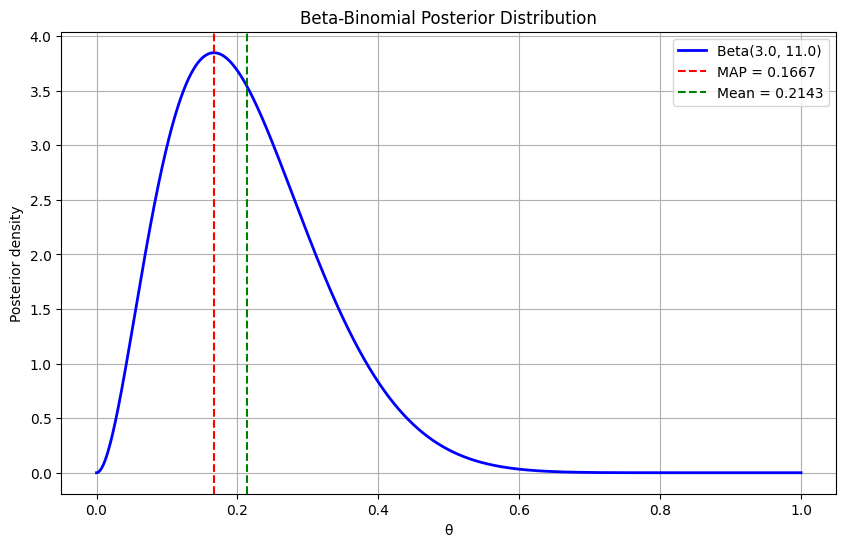


PART 2: BAYESIAN LOGISTIC REGRESSION - HAND CALCULATIONS IN CODE

2.1 Model Setup
Prior: w ~ N(0, α⁻¹I) with α = 1
Likelihood: yₙ|w,xₙ ~ Bernoulli(σ(w^T xₙ))

Example data:
x_1 = [1.  0.5], y_1 = 1
x_2 = [-0.5  1. ], y_2 = 0
x_3 = [ 0.3 -0.8], y_3 = 1

2.2 Log Prior
For w = [w₁, w₂]^T:
log p(w) = -½α||w||² + constant
         = -½(w₁² + w₂²) + constant

2.3 Log Likelihood
log p(y|w) = Σₙ [yₙ log σ(fₙ) + (1-yₙ) log(1-σ(fₙ))]

where fₙ = w^T xₙ:
f₁ = w₁×1.0 + w₂×0.5 = w₁ + 0.5w₂
f₂ = w₁×(-0.5) + w₂×1.0 = -0.5w₁ + w₂
f₃ = w₁×0.3 + w₂×(-0.8) = 0.3w₁ - 0.8w₂

2.7 MAP Optimization
Finding w_MAP by optimizing log p(y,w)...
w_MAP = [0.6604, -0.4213]

2.8 Laplace Approximation
Hessian at MAP:
[[-1.3131763   0.04590702]
 [ 0.04590702 -1.4262921 ]]

Posterior covariance S = -H⁻¹:
[[0.76237017 0.02453785]
 [0.02453785 0.7019084 ]]

2.9 Posterior Predictive for x* = [0.7, -0.2]

Step 1: Distribution of f* = w^T x*
E[f*] = w_MAP^T x* = 0.6604×0.699999988079071 + -0.4213×-0.20000000298023224
      =

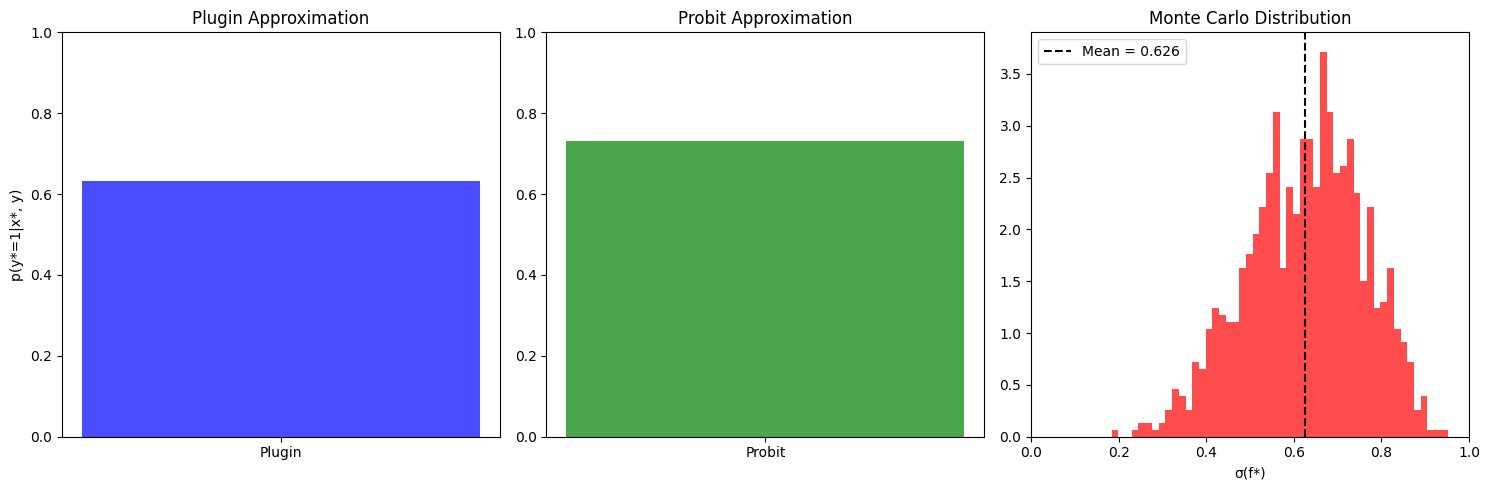

In [1]:
import numpy as np
import jax.numpy as jnp
from scipy.stats import beta, norm
from scipy.special import comb
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt

print("=" * 60)
print("PART 1: BETA-BINOMIAL MODEL - HAND CALCULATIONS IN CODE")
print("=" * 60)

# 1.1 Model Setup
print("\n1.1 Model Setup")
alpha0, beta0 = 1.0, 1.0  # Prior parameters
N = 12  # Number of trials
y = 2   # Number of successes
print(f"Prior: θ ~ Beta({alpha0}, {beta0})")
print(f"Data: y = {y} successes in N = {N} trials")

# 1.2 Prior Distribution
print("\n1.2 Prior Distribution")
print(f"p(θ) = θ^({alpha0}-1) × (1-θ)^({beta0}-1) / B({alpha0}, {beta0})")
print(f"B({alpha0}, {beta0}) = Γ({alpha0})×Γ({beta0})/Γ({alpha0}+{beta0}) = 1")
print("Since α₀=1, β₀=1: p(θ) = 1 (uniform on [0,1])")

# 1.3 Likelihood
print("\n1.3 Likelihood")
binomial_coeff = comb(N, y)
print(f"p(y|θ) = C({N},{y}) × θ^{y} × (1-θ)^{N-y}")
print(f"C({N},{y}) = {N}!/{y}!×{N-y}! = {binomial_coeff}")

# 1.4 Joint Distribution
print("\n1.4 Joint Distribution")
print(f"p(y,θ) = {binomial_coeff} × θ^{y} × (1-θ)^{N-y}")

# 1.5 Log Joint Distribution
print("\n1.5 Log Joint Distribution")
print(f"log p(y,θ) = log({binomial_coeff}) + {y}×log(θ) + {N-y}×log(1-θ)")
print("More generally:")
print(f"log p(y,θ) = ({alpha0}+{y}-1)×log(θ) + ({beta0}+{N}-{y}-1)×log(1-θ) + const")
print(f"          = {alpha0+y-1}×log(θ) + {beta0+N-y-1}×log(1-θ) + const")

# 1.6 Gradient of Log Joint
print("\n1.6 Gradient of Log Joint")
print(f"d/dθ log p(y,θ) = ({alpha0}+{y}-1)/θ - ({beta0}+{N}-{y}-1)/(1-θ)")
print(f"               = {alpha0+y-1}/θ - {beta0+N-y-1}/(1-θ)")

# 1.7 Finding MAP
print("\n1.7 Finding MAP (Setting Gradient to Zero)")
theta_MAP = (alpha0 + y - 1) / (alpha0 + beta0 + N - 2)
print(f"{alpha0+y-1}/θ = {beta0+N-y-1}/(1-θ)")
print(f"θ_MAP = {alpha0+y-1}/{alpha0+beta0+N-2} = {y}/{N} = {theta_MAP:.4f}")

# 1.8 Posterior Distribution
print("\n1.8 Posterior Distribution")
alpha_post = alpha0 + y
beta_post = beta0 + N - y
print(f"p(θ|y) ~ Beta({alpha_post}, {beta_post})")

# 1.9 Posterior Mean and Variance
print("\n1.9 Posterior Mean and Variance")
post_mean = alpha_post / (alpha_post + beta_post)
post_var = (alpha_post * beta_post) / ((alpha_post + beta_post)**2 * (alpha_post + beta_post + 1))
print(f"E[θ|y] = {alpha_post}/{alpha_post + beta_post} = {post_mean:.4f}")
print(f"Var[θ|y] = {alpha_post}×{beta_post}/[({alpha_post + beta_post})²×{alpha_post + beta_post + 1}]")
print(f"         = {alpha_post * beta_post}/{(alpha_post + beta_post)**2 * (alpha_post + beta_post + 1)}")
print(f"         = {post_var:.6f}")

# Plot the posterior
theta_grid = jnp.linspace(0, 1, 1000)
posterior_pdf = beta.pdf(theta_grid, alpha_post, beta_post)

plt.figure(figsize=(10, 6))
plt.plot(theta_grid, posterior_pdf, 'b-', linewidth=2, label=f'Beta({alpha_post}, {beta_post})')
plt.axvline(theta_MAP, color='r', linestyle='--', label=f'MAP = {theta_MAP:.4f}')
plt.axvline(post_mean, color='g', linestyle='--', label=f'Mean = {post_mean:.4f}')
plt.xlabel('θ')
plt.ylabel('Posterior density')
plt.title('Beta-Binomial Posterior Distribution')
plt.legend()
plt.grid(True)
plt.show()

print("\n" + "=" * 60)
print("PART 2: BAYESIAN LOGISTIC REGRESSION - HAND CALCULATIONS IN CODE")
print("=" * 60)

# 2.1 Model Setup
print("\n2.1 Model Setup")
print("Prior: w ~ N(0, α⁻¹I) with α = 1")
print("Likelihood: yₙ|w,xₙ ~ Bernoulli(σ(w^T xₙ))")

# Example data
X = jnp.array([[1.0, 0.5], [-0.5, 1.0], [0.3, -0.8]])
y_data = jnp.array([1, 0, 1])
alpha = 1.0

print("\nExample data:")
for i in range(len(X)):
    print(f"x_{i+1} = {X[i]}, y_{i+1} = {y_data[i]}")

# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + jnp.exp(-z))

# 2.2 Log Prior
print("\n2.2 Log Prior")
print("For w = [w₁, w₂]^T:")
print("log p(w) = -½α||w||² + constant")
print("         = -½(w₁² + w₂²) + constant")

# 2.3 Log Likelihood
print("\n2.3 Log Likelihood")
print("log p(y|w) = Σₙ [yₙ log σ(fₙ) + (1-yₙ) log(1-σ(fₙ))]")
print("\nwhere fₙ = w^T xₙ:")
print("f₁ = w₁×1.0 + w₂×0.5 = w₁ + 0.5w₂")
print("f₂ = w₁×(-0.5) + w₂×1.0 = -0.5w₁ + w₂")
print("f₃ = w₁×0.3 + w₂×(-0.8) = 0.3w₁ - 0.8w₂")

# 2.4 Define objective functions
def log_prior(w, alpha):
    return -0.5 * alpha * jnp.sum(w**2)

def log_likelihood(w, X, y):
    f = X @ w
    return jnp.sum(y * jnp.log(sigmoid(f)) + (1 - y) * jnp.log(1 - sigmoid(f)))

def log_joint(w, X, y, alpha):
    return log_prior(w, alpha) + log_likelihood(w, X, y)

def neg_log_joint(w, X, y, alpha):
    return -log_joint(w, X, y, alpha)

# 2.5 Gradient calculation
def gradient(w, X, y, alpha):
    f = X @ w
    return -X.T @ (sigmoid(f) - y) - alpha * w

# 2.6 Hessian calculation
def hessian(w, X, y, alpha):
    f = X @ w
    p = sigmoid(f)
    S = jnp.diag(p * (1 - p))
    return -X.T @ S @ X - alpha * jnp.eye(len(w))

# 2.7 MAP Optimization
print("\n2.7 MAP Optimization")
print("Finding w_MAP by optimizing log p(y,w)...")

# Initial guess
w_init = jnp.zeros(2)

# Optimize using scipy
from scipy.optimize import minimize
result = minimize(
    lambda w: neg_log_joint(w, X, y_data, alpha),
    w_init,
    jac=lambda w: -gradient(w, X, y_data, alpha),
    method='BFGS'
)

w_MAP = result.x
print(f"w_MAP = [{w_MAP[0]:.4f}, {w_MAP[1]:.4f}]")

# 2.8 Laplace Approximation
print("\n2.8 Laplace Approximation")
H = hessian(w_MAP, X, y_data, alpha)
S = -jnp.linalg.inv(H)

print("Hessian at MAP:")
print(H)
print("\nPosterior covariance S = -H⁻¹:")
print(S)

# 2.9 Posterior Predictive for New Point
print("\n2.9 Posterior Predictive for x* = [0.7, -0.2]")
x_star = jnp.array([0.7, -0.2])

# Step 1: Distribution of f* = w^T x*
f_mean = w_MAP @ x_star
f_var = x_star @ S @ x_star

print("\nStep 1: Distribution of f* = w^T x*")
print(f"E[f*] = w_MAP^T x* = {w_MAP[0]:.4f}×{x_star[0]} + {w_MAP[1]:.4f}×{x_star[1]}")
print(f"      = {f_mean:.4f}")
print(f"Var[f*] = x*^T S x* = {f_var:.4f}")

# Step 2: Plugin Approximation
print("\nStep 2: Plugin Approximation")
p_plugin = sigmoid(f_mean)
print(f"p(y*=1|x*, y) ≈ σ(E[f*]) = σ({f_mean:.4f}) = {p_plugin:.4f}")

# Step 3: Probit Approximation
print("\nStep 3: Probit Approximation")
probit_denom = jnp.sqrt(f_var + jnp.pi/8)
probit_arg = f_mean / probit_denom
p_probit = norm.cdf(probit_arg)
print(f"p(y*=1|x*, y) ≈ Φ(E[f*]/√(Var[f*] + π/8))")
print(f"              = Φ({f_mean:.4f}/√({f_var:.4f} + {jnp.pi/8:.4f}))")
print(f"              = Φ({probit_arg:.4f})")
print(f"              = {p_probit:.4f}")

# Step 4: Monte Carlo
print("\nStep 4: Monte Carlo (1000 samples)")
np.random.seed(42)
n_samples = 1000
f_samples = np.random.normal(f_mean, np.sqrt(f_var), n_samples)
p_samples = sigmoid(f_samples)
p_mc = np.mean(p_samples)
print(f"p(y*=1|x*, y) ≈ (1/{n_samples}) Σ σ(f*ᵢ) = {p_mc:.4f}")

# Summary
print("\n" + "=" * 60)
print("SUMMARY OF PREDICTIONS")
print("=" * 60)
print(f"For x* = {x_star}:")
print(f"Plugin:      {p_plugin:.4f} (ignores uncertainty)")
print(f"Probit:      {p_probit:.4f} (accounts for uncertainty)")
print(f"Monte Carlo: {p_mc:.4f} (most accurate)")

# Visualization of the three methods
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plugin visualization
axes[0].bar(['Plugin'], [p_plugin], color='blue', alpha=0.7)
axes[0].set_ylim([0, 1])
axes[0].set_title('Plugin Approximation')
axes[0].set_ylabel('p(y*=1|x*, y)')

# Probit visualization
axes[1].bar(['Probit'], [p_probit], color='green', alpha=0.7)
axes[1].set_ylim([0, 1])
axes[1].set_title('Probit Approximation')

# Monte Carlo visualization
axes[2].hist(p_samples, bins=50, density=True, alpha=0.7, color='red')
axes[2].axvline(p_mc, color='black', linestyle='--', label=f'Mean = {p_mc:.3f}')
axes[2].set_xlim([0, 1])
axes[2].set_title('Monte Carlo Distribution')
axes[2].set_xlabel('σ(f*)')
axes[2].legend()

plt.tight_layout()
plt.show()